# MODELO PARA EL DIAGNÓSTICO DE CÁNCER DE PRÓSTATA EN IMÁGENES DE RESONANCIA MAGNÉTICA APLICANDO TÉCNICAS DE VISIÓN ARTIFICIAL

Cesar Daniel Rodríguez Castro

Código: 13100582

## Librerías

In [1]:
%matplotlib inline
import os
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from skimage.feature import hog
import pandas as pd

### Tipos de imagenes de RM

In [2]:
TipoImg=os.listdir("Data/Prostate-Cancer-MRI-master/")
TipoImg

['adc', 'dwi0', 'dwi100', 'dwi2000', 'dwi400', 'dwi800', 't2']

# Inicializando, Segmentación y Extracción de características

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


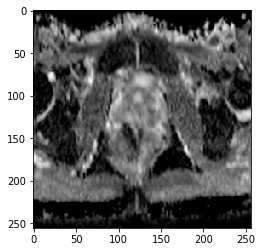

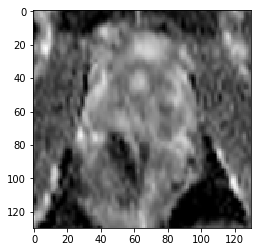

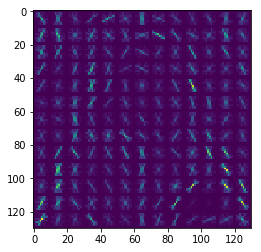

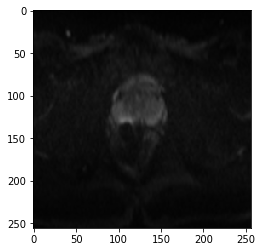

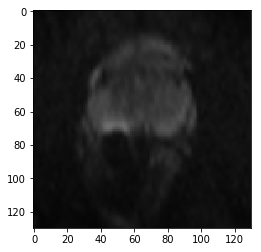

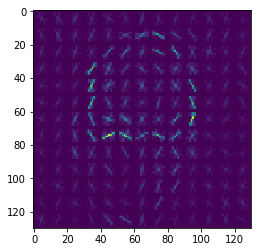

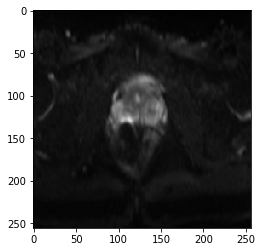

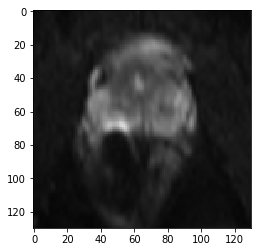

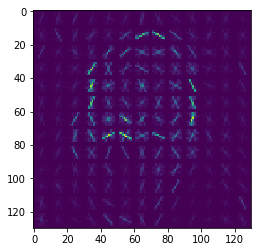

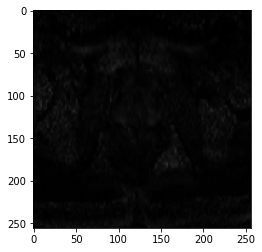

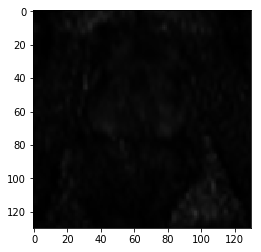

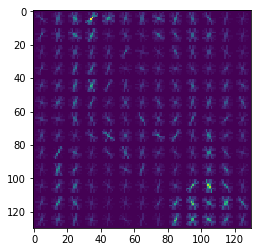

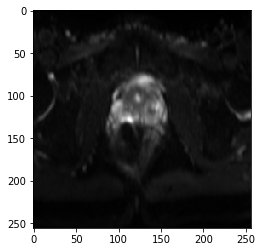

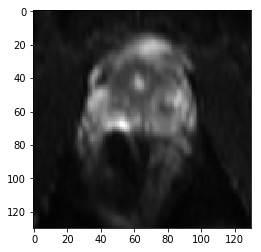

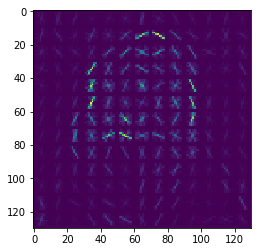

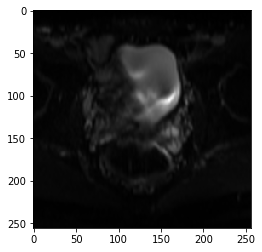

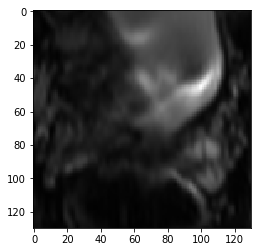

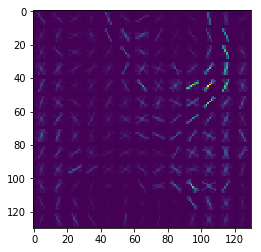

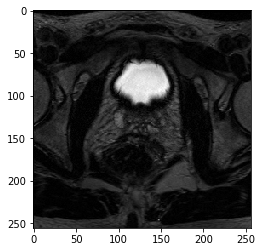

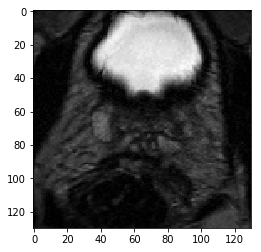

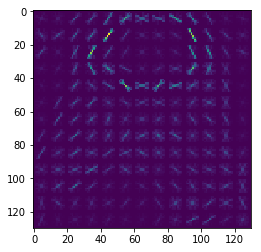

In [3]:
for i in TipoImg:
    Ruta = "Data/Prostate-Cancer-MRI-master/"+i+"/"
    Imagenes= os.listdir(Ruta)
    df_collector = pd.DataFrame([])
    # 
    for Img in Imagenes:
    ##Se lee cada imagen
        imagenOrg=cv.imread(Ruta+Img)
    #Preprocesamiento
        imagenOrg= cv.cvtColor(imagenOrg, cv.COLOR_BGR2RGB)
    #plt.imshow(imagen)
    #plt.show()
    #Segmentación
        imagen= imagenOrg[60:190,60:190]
    #Extraccion de Características
        fdescriptor, hog_image = hog(imagen, orientations=18, pixels_per_cell=(10,10), cells_per_block=(4,4), visualise=True)
        fdescriptor = np.matrix([fdescriptor])
        df = pd.DataFrame(fdescriptor)
        df_collector = df_collector.append(df)
    ##Se guarda los vectores
    
    df_collector.to_csv("VectoresCaracteristicos_"+i+".csv",index=False)
    plt.imshow(imagenOrg)
    plt.show()
    plt.imshow(imagen)
    plt.show()
    plt.imshow(hog_image)
    plt.show()

In [4]:
Imagenes

['t2_patient_1.png',
 't2_patient_10.png',
 't2_patient_11.png',
 't2_patient_12.png',
 't2_patient_13.png',
 't2_patient_14.png',
 't2_patient_15.png',
 't2_patient_16.png',
 't2_patient_17.png',
 't2_patient_18.png',
 't2_patient_19.png',
 't2_patient_2.png',
 't2_patient_20.png',
 't2_patient_21.png',
 't2_patient_22.png',
 't2_patient_23.png',
 't2_patient_24.png',
 't2_patient_25.png',
 't2_patient_26.png',
 't2_patient_27.png',
 't2_patient_28.png',
 't2_patient_29.png',
 't2_patient_3.png',
 't2_patient_30.png',
 't2_patient_31.png',
 't2_patient_32.png',
 't2_patient_33.png',
 't2_patient_34.png',
 't2_patient_35.png',
 't2_patient_36.png',
 't2_patient_37.png',
 't2_patient_38.png',
 't2_patient_39.png',
 't2_patient_4.png',
 't2_patient_40.png',
 't2_patient_41.png',
 't2_patient_42.png',
 't2_patient_43.png',
 't2_patient_44.png',
 't2_patient_45.png',
 't2_patient_46.png',
 't2_patient_47.png',
 't2_patient_48.png',
 't2_patient_49.png',
 't2_patient_5.png',
 't2_patient_50

# Modelado

Ejemplo de Vector Característico

In [5]:
pd.read_csv("VectoresCaracteristicos_t2.csv")

,0,1,2,3,4,5,6,7,8,9,...,28790,28791,28792,28793,28794,28795,28796,28797,28798,28799
0,0.003204,0.001644,0.001783,0.000692,0.008091,0.017465,0.025914,0.009725,0.006170,0.009149,...,0.000811,0.006783,0.002143,0.001392,0.001067,0.001148,0.002771,0.001106,0.001639,0.003402
1,0.002821,0.001076,0.001559,0.003500,0.003785,0.002484,0.003245,0.000976,0.002133,0.011552,...,0.000846,0.001975,0.000617,0.000464,0.001462,0.002170,0.003664,0.002619,0.003752,0.002933
2,0.002410,0.000301,0.001634,0.003916,0.008685,0.021714,0.005337,0.001977,0.000319,0.001490,...,0.000000,0.007633,0.000773,0.000079,0.004756,0.006028,0.016502,0.011791,0.010666,0.002515
3,0.004529,0.001202,0.003825,0.002605,0.002467,0.002232,0.002026,0.001220,0.001575,0.005489,...,0.002695,0.009412,0.010154,0.003941,0.005191,0.001792,0.001378,0.001134,0.000737,0.000880
4,0.004507,0.000681,0.000965,0.001826,0.001169,0.001015,0.001188,0.001036,0.000000,0.003349,...,0.001292,0.006266,0.002665,0.000508,0.001007,0.001758,0.003566,0.004702,0.002057,0.000000
5,0.001028,0.000249,0.000230,0.003442,0.000000,0.009341,0.024998,0.015858,0.010759,0.010695,...,0.002411,0.006154,0.004819,0.004139,0.005057,0.002489,0.003468,0.000735,0.001302,0.000764
6,0.003927,0.001552,0.000692,0.001880,0.001532,0.002479,0.001988,0.001553,0.000314,0.002992,...,0.003916,0.005809,0.004814,0.008243,0.004432,0.001823,0.003396,0.004110,0.005338,0.002391
7,0.002237,0.000133,0.001434,0.000755,0.000755,0.003735,0.000913,0.002772,0.003086,0.004151,...,0.001384,0.003784,0.000438,0.000826,0.001538,0.001580,0.000335,0.001332,0.000791,0.005609
8,0.011290,0.003992,0.007500,0.013571,0.012319,0.011866,0.005838,0.004881,0.000583,0.010136,...,0.002721,0.006538,0.001675,0.000000,0.002104,0.001180,0.003072,0.001146,0.001371,0.000380
9,0.004045,0.000736,0.002446,0.001802,0.006966,0.010201,0.004519,0.001259,0.002448,0.006294,...,0.001519,0.002848,0.003171,0.001493,0.001860,0.003485,0.001920,0.004010,0.002881,0.006071


In [6]:
##Los diagnosticos REALES de todos los pacientes
RealY=pd.read_excel("Data/Diagnosticos.xlsx")
RealY

,Patient,Diagnose
0,1,1
1,10,1
2,11,0
3,12,1
4,13,1
5,14,0
6,15,0
7,16,0
8,17,1
9,18,0


     Librerías

In [7]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Entrenamiento y Prueba

In [8]:
for i in TipoImg:
    print("======================================")
    print("TIPO DE IMAGEN DE RESONANCIA MAGNÉTICA:"+i)
    print("======================================")
    Data=pd.read_csv("VectoresCaracteristicos_"+i+".csv")
    Data["Diagnose"]=list(RealY["Diagnose"])
    X=Data.iloc[:,0:-1]
    Y=Data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state = 0, stratify=Y)
    
    svc = SVC(C=100, gamma=0.01)
    svc.fit(X_train, y_train)
    print("SVM Exactitud en entrenamiento: {:.2f}".format(svc.score(X_train, y_train)))
    print("SVM Exactitud en prueba: {:.2f}".format(svc.score(X_test, y_test)))
    print("***********************************")
    rnclf = MLPClassifier(solver='lbfgs',random_state = 0)
    rnclf.fit(X_train, y_train)
    print("RN Exactitud en entrenamiento: {:.2f}".format(rnclf.score(X_train, y_train)))
    print("RN Exactitud en prueba: {:.2f}".format(rnclf.score(X_test, y_test)))
    print("***********************************")
    gbclf = GradientBoostingClassifier(n_estimators=100, random_state = 0)
    gbclf.fit(X_train, y_train)
    print("GB Exactitud en entrenamiento: {:.2f}".format(gbclf.score(X_train, y_train)))
    print("GB Exactitud en prueba: {:.2f}".format(gbclf.score(X_test, y_test)))
    print("***********************************")
    rfclf = RandomForestClassifier(n_estimators=5,random_state = 0)
    rfclf.fit(X_train, y_train)
    print("RF Exactitud en entrenamiento: {:.2f}".format(rfclf.score(X_train, y_train)))
    print("RF Exactitud en prueba: {:.2f}".format(rfclf.score(X_test, y_test)))
    print("***********************************")
    adclf = DecisionTreeClassifier(random_state = 0)
    adclf.fit(X_train, y_train)
    print("AD Exactitud en entrenamiento: {:.2f}".format(adclf.score(X_train, y_train)))
    print("AD Exactitud en prueba: {:.2f}".format(adclf.score(X_test, y_test)))
    print("=========================================================================================")
    print("=========================================================================================")

TIPO DE IMAGEN DE RESONANCIA MAGNÉTICA:adc
SVM Exactitud en entrenamiento: 1.00
SVM Exactitud en prueba: 0.50
***********************************
RN Exactitud en entrenamiento: 1.00
RN Exactitud en prueba: 0.62
***********************************
GB Exactitud en entrenamiento: 1.00
GB Exactitud en prueba: 0.62
***********************************
RF Exactitud en entrenamiento: 0.93
RF Exactitud en prueba: 0.50
***********************************
AD Exactitud en entrenamiento: 1.00
AD Exactitud en prueba: 0.69
TIPO DE IMAGEN DE RESONANCIA MAGNÉTICA:dwi0
SVM Exactitud en entrenamiento: 1.00
SVM Exactitud en prueba: 0.31
***********************************
RN Exactitud en entrenamiento: 1.00
RN Exactitud en prueba: 0.50
***********************************
GB Exactitud en entrenamiento: 1.00
GB Exactitud en prueba: 0.44
***********************************
RF Exactitud en entrenamiento: 0.96
RF Exactitud en prueba: 0.56
***********************************
AD Exactitud en entrenamiento: 1.00


## Probando los modelos

In [9]:
#El diagnostico según el modelo
Yclasificación=svc.predict(X_test)
Yclasificación

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
#Este es el diagnóstico real
y_test

39    1
23    0
28    0
36    1
59    1
52    1
41    0
40    1
4     1
7     0
33    1
0     1
2     0
50    0
14    0
18    0
Name: Diagnose, dtype: int64

In [11]:
confusion_matrix(y_test, Yclasificación,labels=[0,1])

array([[6, 2],
       [3, 5]], dtype=int64)